In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        # super메서드를 사용하면 부모클래스의 __init__메서드를 먼저 호출하고! 그 다음에 자식 클래스의 __init__를 진행
        # 요거 중요하다!!
        self.fc1 = nn.Linear(3,5)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(5,5)
        self.outputact = nn.Softmax()
        

        #init에서는 *객체*를 만드는 거야
        #근데 무슨 객체냐? - 앞으로 너가 사용할 함수, 신경망 노드들등 모든 것에 대한 객체
        # 소프트맥스, 렐루, 노드 갯수 등 전부 다 만들어야 돼 

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.outputact(x)
        return x
b = torch.tensor([[1.,2.,3.],[4,5,6]])
a = MyModel()
a.forward(b)



/opt/anaconda3/lib/python3.12/site-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[0.3040, 0.0935, 0.1670, 0.2740, 0.1614],
        [0.3067, 0.0478, 0.1293, 0.3984, 0.1177]], grad_fn=<SoftmaxBackward0>)

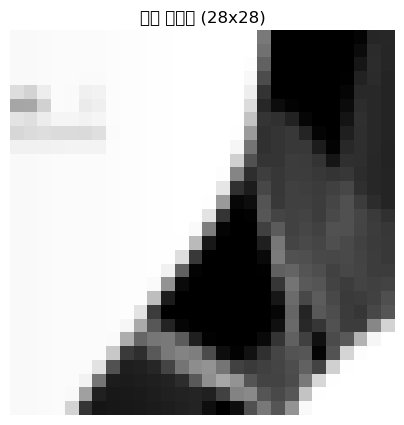

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45328 (\N{HANGUL SYLLABLE NEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


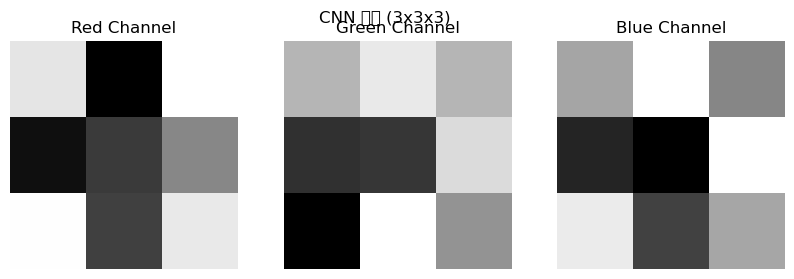

In [6]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

# 이미지 불러오기 (MNIST 예제처럼 28x28 크기)
image_path = "/Users/kang-ei-yui/workspace/인공지능을 위한 선형대수 _ 실습 Ⅰ _ 부스트코스_files/zC1xNIQtgtJQ2qSJmbqJ.PNG"  # 샘플 이미지 경로
image = Image.open(image_path).convert('L')  # 흑백 변환 (Grayscale)

# PyTorch 텐서 변환
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # 28x28 크기로 변경
    transforms.ToTensor()
])
input_tensor = transform(image)

# 이미지 시각화
plt.figure(figsize=(5,5))
plt.imshow(input_tensor.squeeze(), cmap='gray')  # 채널 차원 제거 후 시각화
plt.title("입력 이미지 (28x28)")
plt.axis("off")
plt.show()

import numpy as np

# 3x3x3 필터 생성 (랜덤 값)
kernel = np.random.rand(3, 3, 3)

# 필터 시각화
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
channel_names = ["Red Channel", "Green Channel", "Blue Channel"]
for i, ax in enumerate(axes):
    ax.imshow(kernel[i], cmap='gray')
    ax.set_title(channel_names[i])
    ax.axis("off")
plt.suptitle("CNN 커널 (3x3x3)")
plt.show()



/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51669 (\N{HANGUL SYLLABLE JING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47605 (\N{HANGUL SYLLABLE MAEB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure

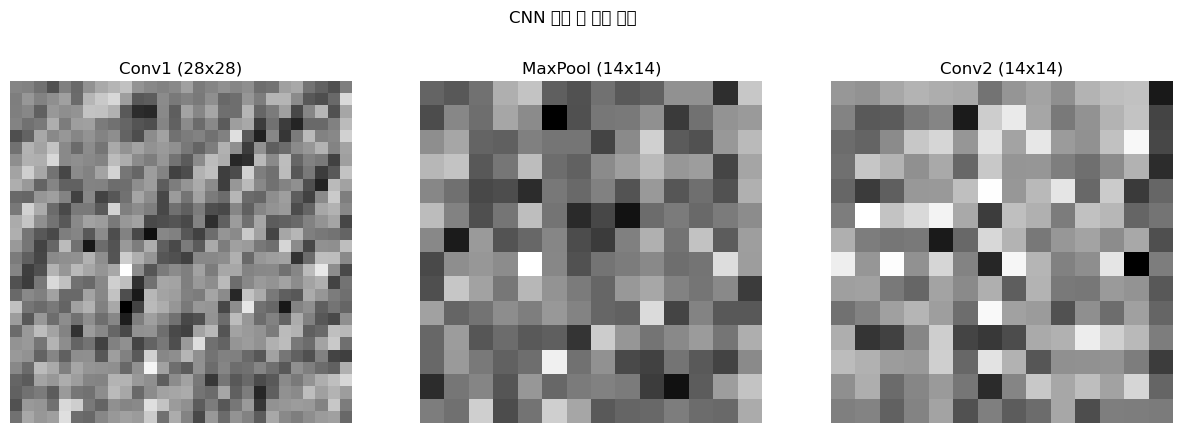

In [7]:
import torch.nn as nn

# CNN 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)  # (28x28 → 28x28)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1)  # (28x28 → 28x28)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # (28x28 → 14x14)

    def forward(self, x):
        x = self.conv1(x)
        feature_map1 = x.clone().detach()  # 첫 번째 Conv 출력 저장
        x = self.pool(x)
        feature_map2 = x.clone().detach()  # 풀링 후 출력 저장
        x = self.conv2(x)
        feature_map3 = x.clone().detach()  # 두 번째 Conv 출력 저장
        return feature_map1, feature_map2, feature_map3

# 모델 생성
model = SimpleCNN()

# 더미 입력 데이터 (1채널, 28x28 이미지)
input_tensor = torch.randn(1, 1, 28, 28)

# 특징 맵 출력
feature_map1, feature_map2, feature_map3 = model(input_tensor)

# 특징 맵 크기 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Conv1 (28x28)", "MaxPool (14x14)", "Conv2 (14x14)"]
feature_maps = [feature_map1, feature_map2, feature_map3]

for i, ax in enumerate(axes):
    ax.imshow(feature_maps[i][0, 0].detach().numpy(), cmap='gray')
    ax.set_title(titles[i])
    ax.axis("off")

plt.suptitle("CNN 특징 맵 크기 변화")
plt.show()
